In [1]:
from bw_recipe_2016 import (
    LandTransformation,
    get_biosphere_database, 
    extract_recipe,
)

In [2]:
data = extract_recipe()[16]

In [3]:
biosphere = get_biosphere_database()

In [4]:
gw = LandTransformation(data, biosphere)

In [5]:
gw.apply_strategies()

Applying strategy: generic_reformat
Applying strategy: set_unit
Applying strategy: complete_method_name
Applying strategy: match_multiple
Applied 4 strategies in 0.01 seconds


In [6]:
gw.data[0]

{'name': ('ReCiPe 2016', 'v1.1 (20180117)', 'Land transformation'),
 'unit': 'm2∙annual crop eq',
 'filename': 'ReCiPe2016_CFs_v1.1_20180117.xlsx',
 'description': '',
 'exchanges': [{'name': 'Transformation, from grassland, natural (non-use)',
   'categories': '',
   'amount': 3.75,
   'input': ('biosphere3', 'b905c2e0-a0db-4e66-80d2-8bdfc93c6218')},
  {'name': 'Transformation, from forest, primary (non-use)',
   'categories': '',
   'amount': 36.75,
   'input': ('biosphere3', '9d136389-8670-45ae-ad1d-a06848a1fd1d')},
  {'name': 'Transformation, from forest, secondary (non-use)',
   'categories': '',
   'amount': 36.75,
   'input': ('biosphere3', '9cc80820-fcf9-4ea9-8e67-0aa423eba6a4')},
  {'name': 'Transformation, from shrub land, sclerophyllous',
   'categories': '',
   'amount': 3.75,
   'input': ('biosphere3', '17a5a406-333f-4b9e-8852-c2de50bc9585')},
  {'name': 'Transformation, from wetland, inland (non-use)',
   'categories': '',
   'amount': 3.75,
   'input': ('biosphere3', '07

In [7]:
gw.write_excel("land_transformation")

Wrote matching file to:
/Users/cmutel/Library/Application Support/Brightway3/default.c21f969b/output/lcia-matching-land_transformation.xlsx


In [8]:
gw.statistics()

1 methods
9 cfs
0 unlinked cfs


(1, 9, 0)

In [9]:
comp = gw.compare_to_previous()

In [10]:
import bw2data

for flow, cf in bw2data.Method(gw.previous_reference).load():
    print(bw2data.get_activity(flow))

'Transformation, from annual crop' (square meter, None, ('natural resource', 'land'))
'Transformation, from annual crop, flooded crop' (square meter, None, ('natural resource', 'land'))
'Transformation, from annual crop, greenhouse' (square meter, None, ('natural resource', 'land'))
'Transformation, from annual crop, irrigated' (square meter, None, ('natural resource', 'land'))
'Transformation, from annual crop, irrigated, extensive' (square meter, None, ('natural resource', 'land'))
'Transformation, from annual crop, irrigated, intensive' (square meter, None, ('natural resource', 'land'))
'Transformation, from annual crop, non-irrigated' (square meter, None, ('natural resource', 'land'))
'Transformation, from annual crop, non-irrigated, extensive' (square meter, None, ('natural resource', 'land'))
'Transformation, from annual crop, non-irrigated, intensive' (square meter, None, ('natural resource', 'land'))
'Transformation, from arable land, unspecified use' (square meter, None, ('nat

In [11]:
[(key, len(comp[key])) for key in comp]

[('found', 9), ('missing', 0), ('reference', 120)]

Present in previous ReCiPe, missing here

In [13]:
comp['reference']

{'phosphate', 'phosphoric acid', 'phosphorus'}

In [14]:
comp['found']

{'phosphate', 'phosphoric acid', 'phosphorus'}

In [12]:
sorted(comp['reference'].difference(comp['found']))

['transformation, from annual crop',
 'transformation, from annual crop, flooded crop',
 'transformation, from annual crop, greenhouse',
 'transformation, from annual crop, irrigated',
 'transformation, from annual crop, irrigated, extensive',
 'transformation, from annual crop, irrigated, intensive',
 'transformation, from annual crop, non-irrigated',
 'transformation, from annual crop, non-irrigated, extensive',
 'transformation, from annual crop, non-irrigated, intensive',
 'transformation, from arable land, unspecified use',
 'transformation, from bare area (non-use)',
 'transformation, from cropland fallow (non-use)',
 'transformation, from dump site',
 'transformation, from dump site, inert material landfill',
 'transformation, from dump site, residual material landfill',
 'transformation, from dump site, sanitary landfill',
 'transformation, from dump site, slag compartment',
 'transformation, from field margin/hedgerow',
 'transformation, from forest, extensive',
 'transformati

In [ ]:
c['found']

In [ ]:
c['missing']

In [13]:
gw.write_methods(overwrite=True)

Wrote 1 LCIA methods with 9 characterization factors


In [14]:
gw.data[0]['name']

('ReCiPe 2016', 'v1.1 (20180117)', 'Land transformation')

# Compare to previous ReCiPe method

In [15]:
%matplotlib inline

In [16]:
import bw2data, bw2calc
import pyprind
import seaborn as sb
import numpy as np

In [17]:
keys = sorted([x.key for x in bw2data.Database("ecoinvent 3.6 cutoff")])

In [18]:
results_reference, results_2016 = [], []

In [19]:
lca = bw2calc.LCA({keys[0]: 1}, gw.previous_reference)
lca.lci()
lca.lcia()

In [20]:
reference_cm = lca.characterization_matrix.copy()

In [21]:
lca.switch_method(('ReCiPe 2016', 'v1.1 (20180117)', 'Land transformation'))

In [22]:
lca.characterization_matrix.sum(), reference_cm.sum()

(36.75, -6.0)

In [23]:
new_cm = lca.characterization_matrix.copy()

In [24]:
for key in pyprind.prog_bar(keys):
    lca.redo_lci({key: 1})
    results_reference.append((reference_cm * lca.inventory).sum())
    results_2016.append((new_cm * lca.inventory).sum())    

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:05:02


/Users/cmutel/miniconda3/envs/bw2dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


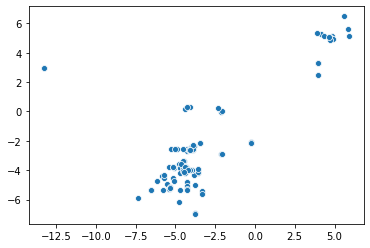

In [25]:
sb.scatterplot(np.log10(np.array(results_reference)), np.log10(np.array(results_2016)))

In [26]:
def masked_ratio(a, b):
    a, b = np.array(a), np.array(b)
    mask = (a != 0) * (b != 0)
    return a / b

/Users/cmutel/miniconda3/envs/bw2dev/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


OverflowError: cannot convert float infinity to integer

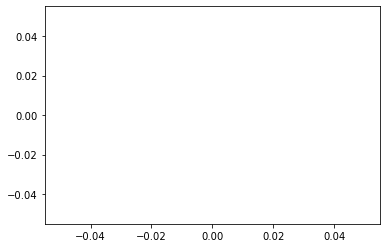

In [23]:
sb.distplot(masked_ratio(results_2016, results_reference))

In [24]:
def abnormal_ratio(a, b):
    if not a or not b:
        return
    ratio = abs(a / b)
    if 0.8 < ratio < 1.25:
        return
    return ratio

In [ ]:
exceptions = sorted([
    (abnormal_ratio(results_2016[i], results_reference[i]), bw2data.get_activity(key)) 
    for i, key in enumerate(keys) 
    if abnormal_ratio(results_2016[i], results_reference[i])
], reverse=True)

In [ ]:
len(exceptions)

In [ ]:
exceptions[:10]

In [ ]:
lca.redo_lci({exceptions[0][1]: 1})
lca.characterized_inventory = new_cm * lca.inventory